<h1>Analyzing data with Python: "Where Do People Drink?"</h1>

Project based on assignment by "IBM DA0101EN- Analyzing Data with Python".

Dataset: <a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/>  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  

@author: Mariana R. Barros

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

<b>Importing the Data</b>


In [3]:
df= pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%206/drinks.csv')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [4]:
#Displaying the data types of each column.
print(df.dtypes)

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [5]:
#Getting the number of wine servings per continent.
df.groupby('continent')['wine_servings'].sum()

continent
Africa            862
Asia              399
Europe           6400
North America     564
Oceania           570
South America     749
Name: wine_servings, dtype: int64

In [7]:
# Statistical summary and analysis of beer servings for each continent.
df.groupby('continent')['beer_servings'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
Asia,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
Europe,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
North America,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
Oceania,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
South America,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


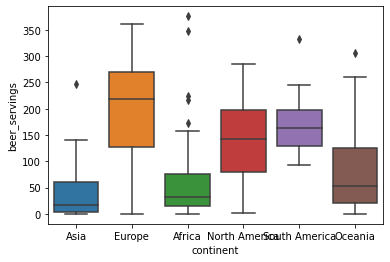

In [8]:
# Plot showing the number of beer servings on each continent
import seaborn as sns 
sns.boxplot(x="continent", y="beer_servings", data=df)

,wine_servings,beer_servings
wine_servings,1.000000,0.527172
beer_servings,0.527172,1.000000


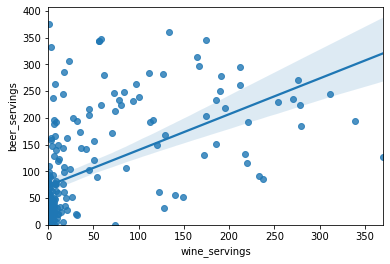

In [10]:
#Determining if the number of wine servings is negatively or positively correlated with the number of beer servings.
sns.regplot(x="wine_servings", y="beer_servings", data=df)
plt.ylim(0,)

df[['wine_servings', 'beer_servings']].corr()

In [11]:
#Fitting a linear regression model to predict the 'total_litres_of_pure_alcohol' using the number of 'wine_servings'
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
x = df[['wine_servings']]
y= df['total_litres_of_pure_alcohol']

model = lm.fit(x,y)

print('intercep:',lm.intercept_)
print('coef',lm.coef_)

yhat = lm.predict(x)
print('yhat = ',yhat[0:5])

#Calculating $R^{2}$
print('R^2=',lm.score(x,y))

intercep: 3.1540794346874996
coef [0.03160757]
yhat =  [ 3.15407943  4.86088833  3.59658545 13.01564196  4.57642018]
R^2= 0.4456875459787605


In [12]:
#Using list of features to predict the 'total_litres_of_pure_alcohol'
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

z = df[['wine_servings', 'beer_servings','spirit_servings']]


#Splitting the data into training and testing:
z_train, z_test, y_train, y_test = train_test_split(z, y, test_size=0.10, random_state=0)


lm2 = LinearRegression()
model2=  lm2.fit(z_train, y_train)

print('intercept = ',lm2.intercept_)
print('coef = ',lm2.coef_)

a = lm2.predict(z_test)[0:5]
print('yhat=',a)


print('Rˆ2 test = ',lm2.score(z_test, y_test))

intercept =  0.7205898393369674
coef =  [0.01621009 0.01809258 0.0157659 ]
yhat= [0.72058984 4.95383012 8.45405404 0.82260947 0.72058984]
Rˆ2 test =  0.6990304512837944


In [18]:
#Creating a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. 
#Fitting the object using the training data in the question above, then calculate the R^2 using the test data. 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(z,y)
pipe.fit(z_train[['beer_servings', 'spirit_servings', 'wine_servings']], y_train)
print(pipe.score(z_test[['beer_servings', 'spirit_servings', 'wine_servings']], y_test))

ypipe=pipe.predict(z)
print(ypipe[0:4])

0.7076376133886035
[ 0.67483964  4.74991915  1.18512597 12.477158  ]


In [19]:
#Creating and fitting a Ridge regression object using the training data, 
#Regularization parameter= 0.1 
#Calculating  𝑅2  using the test data.

from sklearn.linear_model import Ridge

RigeModel = Ridge(alpha=0.1) 
RigeModel.fit(z_train, y_train)
RigeModel.score(z_test, y_test)

0.6990304549019177

In [21]:
#Performing a 2nd order polynomial transform on both the training data and testing data. 
pr=PolynomialFeatures(degree=2)
z_train_pr=pr.fit_transform(z_train)
x_test_pr=pr.fit_transform(z_test)

#Creating and fitting a Ridge regression object using the training data
#Regularization parameter=0.1. 
RigeModel=Ridge(alpha=0.1)

RigeModel.fit(z_train, y_train)

yhat = RigeModel.predict(z_train)

#Calculating the  𝑅2  utilizing the test data provided. 
RigeModel.score(z_test, y_test)

0.6990304549019177